In [1]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from distributions.rv import alshenawy
from distributions.continuous import Alshenawy

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Users/aline/Documents/ICMC/Disciplinas/BECD/202402/SME0809/Trabalho/alshenawy-distribution/distributions/rv.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp((1 / beta) * (1 - np.exp(beta / x)))
/Users/aline/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aline/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aline/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

[(0.0, 50.0), (0.0, 0.2)]

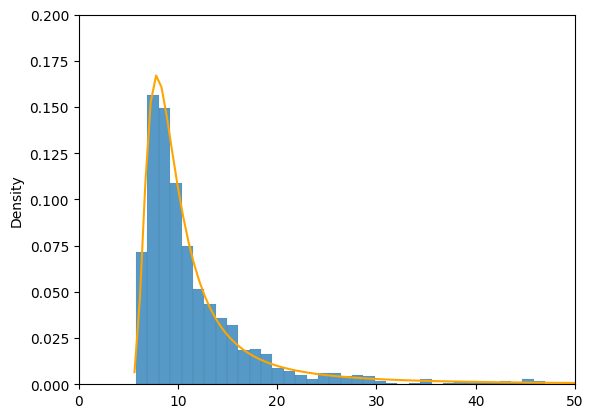

In [2]:
fig, ax = plt.subplots()

beta = 30
samples = pm.draw(Alshenawy.dist(beta), 1000)
rv = alshenawy(beta=beta)

xs = np.linspace(rv.ppf(0.001), rv.ppf(0.99), num=200)
ys = rv.pdf(xs)
sns.histplot(samples, stat="density", ax=ax)
sns.lineplot(x=xs, y=ys, color="orange", ax=ax)
ax.set(xlim=(0, 50), ylim=(0,0.2))

In [3]:
sample = alshenawy(beta=beta).rvs(100)

In [4]:
with pm.Model() as model:
    beta = pm.Gamma("beta", 1, 1)
    y = Alshenawy("y", beta=beta, observed=sample)

In [ ]:
with model:
    idata = pm.sample(draws=1000, chains=4, return_inferencedata=True)
    pm.sample_posterior_predictive(idata)

Sampling ... ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  20% 0:11:49 / 0:03:05